This is meant to be a simple SKLearn tutorial/cheatsheet notebook. Written by Drace Zhan of NYCDSA for student/public use.
Note that the mathematics behind the models will not be covered here and the examples used will be purely for artificial purposes so there won't be any preprocessing, train-test-splits, verifying assumptions, etc.

In [3]:
#data manipulation tools
import numpy as np
import pandas as pd

#data visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
#loading datasets used for this notebook

from sklearn import datasets

In [5]:
#loading iris from dictionary to dataframe
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [6]:
#loading boston dataset from dictionary to dataframe
boston = datasets.load_boston()
boston_df = pd.DataFrame(boston.data, columns= boston.feature_names)
boston_df['target'] = boston.target

In [7]:
#Linear Regression & Logistic Regression
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression

In [8]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Note: Model objects in Sklearn has various parameters and arguments you can pass in to the object as you create it. I highly recommend reading the documentation to understand what you can do to adjust the parameters on it. One of the more useful ones is "n_jobs". This argument is the amount of cores your CPU will use running the model. Setting it to -1 such as "n_jobs = -1" will force it to use ALL your cores. Your laptop will get quite hot during this.

In [9]:
#creating a Linear regression in SKlearn
linreg_1 = LinearRegression()

Giving the X & y labels in Python can be a bit strange. The thing to keep in mind is that you are trying to pass in the values of your X and not the column names themselves. I recommend first creating a list of your column names before passing it into X as the example below.

In [14]:
#creating X, y for Boston dataset, for this toy example, we'll be using all the columns except for Y for a toy example.
b_feat_list = boston_df.columns[0:-1]
X = boston_df[b_feat_list]
y = boston_df.target

Once you create the model object, it will allow you to fit data into it and then will start training to your data. After the model finishes training, it will allow you to call on the various attributes of the now trained model. This will be elaborated further below.

In [9]:
#fitting the LinearRegression object to your data
linreg_1.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

After we have created the object, you'll note it now has several attributes you can call upon. Feel free to experiment with them! I will list some of the more useful ones below.

In [10]:
#getting the coefficients of your LinearRegression object
linreg_1.coef_

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01])

In [11]:
#getting the intercept
linreg_1.intercept_

36.491103280363404

In [12]:
#Getting the R2 score of your model
linreg_1.score(X, y)

0.7406077428649428

In [13]:
#Predicting with your model
linreg_1.predict(X)

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,
        27.94288232,  25.25940048,  23.00433994,  19.5347558 ,
        11.51696539,  18.91981483,  18.9958266 ,  21.58970854,
        20.90534851,  19.55535931,  19.2837957 ,  19.30000174,
        20.52889993,  16.9096749 ,  16.17067411,  18.40781636,
        12.52040454,  17.67104565,  15.82934891,  13.80368317,
        15.67708138,  13.3791645 ,  15.46258829,  14.69863607,
        19.54518512,  20.87309945,  11.44806825,  18.05900412,
         8.78841666,  14.27882319,  13.69097132,  23.81755469,
        22.34216285,  23.11123204,  22.91494157,  31.35826216,
        34.21485385,  28.0207132 ,  25.20646572,  24.61192851,
        22.94438953,  22.10150945,  20.42467417,  18.03614022,
         9.10176198,  17.20856571,  21.28259372,  23.97621248,
        27.65853521,  24.0521088 ,  15.35989132,  31.14817003,
        24.85878746,  33.11017111,  21.77458036,  21.08526739,
        17.87203538,  18.50881381,  23.9879809 ,  22.54

In [14]:
#passing in another set for your model to predict
X_test = X[0:30]
linreg_1.predict(X_test)

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,
        27.94288232,  25.25940048,  23.00433994,  19.5347558 ,
        11.51696539,  18.91981483,  18.9958266 ,  21.58970854,
        20.90534851,  19.55535931,  19.2837957 ,  19.30000174,
        20.52889993,  16.9096749 ,  16.17067411,  18.40781636,
        12.52040454,  17.67104565,  15.82934891,  13.80368317,
        15.67708138,  13.3791645 ,  15.46258829,  14.69863607,
        19.54518512,  20.87309945])

Similar to how you create a Linear Regression object, Logistic Regression is much the same. Some things that are useful in the Logistic Regression arguments include "class_weight" to handle imbalanced classes. In addition, the Logistic Regression object will automatically include regularization (ridge by default but you can set to lasso as well). You can combat this by setting the C value to a very large number.

In [15]:
logit_1 = LogisticRegression()

In [16]:
#similar steps to 
iris_feat_list = iris_df.columns[0:-1]
iris_X = iris_df[iris_feat_list]
iris_y = iris_df.target

In [17]:
logit_1.fit(iris_X, iris_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Much like LinearRegression, the LogisticRegression model will have many attributes you can call upon. In addition to standard prediction, the logistic regression model will also allow you to show probabilities of your predictions as well as log probabilities as well.

In [18]:
#Predictions
logit_1.predict(iris_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
#Prediction probabilities
iris_predict_data = pd.DataFrame(logit_1.predict_proba(iris_X))
iris_predict_data

,0,1,2
0,0.879682,0.120308,1.081314e-05
1,0.799706,0.200263,3.038254e-05
2,0.853797,0.146177,2.590313e-05
3,0.825383,0.174559,5.793567e-05
4,0.897324,0.102665,1.120500e-05
5,0.926987,0.073000,1.296939e-05
6,0.895065,0.104896,3.925062e-05
7,0.861840,0.138141,1.890958e-05
8,0.803157,0.196758,8.478611e-05
9,0.795422,0.204553,2.568322e-05


In [20]:
#Prediction of log odds
iris_log_predict = pd.DataFrame(logit_1.predict_log_proba(iris_X))
iris_log_predict


,0,1,2
0,-0.128195,-2.117704,-11.434749
1,-0.223511,-1.608122,-10.401643
2,-0.158062,-1.922935,-10.561147
3,-0.191908,-1.745493,-9.756177
4,-0.108339,-2.276282,-11.399150
5,-0.075816,-2.617290,-11.252919
6,-0.110859,-2.254788,-10.145543
7,-0.148686,-1.979477,-10.875842
8,-0.219205,-1.625778,-9.375379
9,-0.228883,-1.586929,-10.569673


Decision Trees and Tree based models are also in Sklearn. While decision tree and random forest are often taught together, it's important to remember that most tree based models are ensembles so they are imported from different areas in sklearn.
As tree based models have lots of parameters that are reliant on theory of trees, I won't go too indepth into them here except to highlight some common parameters that are often tuned.
Trees can be split along according to gini or entropy as I'm using a Classifier here. It's worth evaluating which metrics gives you better performance even though both attempt to do similar things. Regressor models have other criterias as well such as "mse", etc. Standard things such as max_depth, min_samples_split, min_samples_leaf, etc can all be tuned as well. Note that the max_features is set to "None" when generally the "standard" practice is set it to square root of your features. Both "sqrt" or "auto" will adjust this.

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
iris_tree = DecisionTreeClassifier()

In [23]:
iris_tree.fit(iris_X, iris_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [24]:
#Examining feature importances of your tree model
iris_tree.feature_importances_

array([ 0.01333333,  0.        ,  0.56405596,  0.42261071])

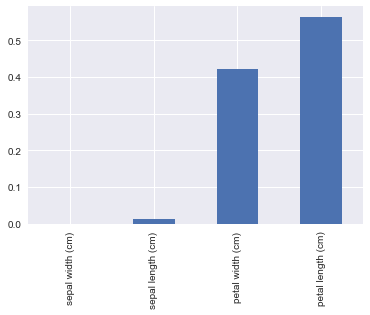

In [25]:
#A neat way to visualize your feature importance!
pd.Series(index = iris_feat_list, data = iris_tree.feature_importances_).sort_values().plot(kind = 'bar')

In [26]:
#Examining different classes in your class target
iris_tree.n_classes_

3

In [27]:
#counting how many features are in your model
iris_tree.n_features_

4

As mentioned, Sklearn's Random Forest and Gradient Boosting Machine are both under ensemble models. Most of the parameters are similar to tree's model itself so I'll simply be going over some ensemble specific parameters. Note you can also use VotingClassifier from this package as a simple ensemble object if you want to play with model ensembling a bit on your own.

In [28]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier

One of the things to note is that since these are ensembles of decision trees, one new parameter is "n_estimators". This signifies the amount of trees you desire for your ensemble. Generally a larger number such as 1000-2000 is recommended but we'll use the default 10 for this toy example. Another thing worth noting is that max_features is set to "auto" to designate that it will use square root of total features when considering a split.

In [29]:
boston_rf_1 = RandomForestRegressor()

In [30]:
boston_rf_1.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [31]:
#This will show you the base estimator of your ensemble, in this case, a decision tree regressor
boston_rf_1.base_estimator

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [32]:
#This will show you a list of ALL the estimators in your model
boston_rf_1.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=47890994, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1501403514, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1295269591, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_n

In [33]:
#Predicting with model
boston_rf_1.predict(X)

array([ 26.36,  22.58,  36.48,  33.83,  35.62,  27.01,  21.69,  24.09,
        18.12,  19.18,  16.48,  19.17,  21.12,  20.3 ,  18.88,  19.9 ,
        21.94,  18.12,  20.08,  18.98,  13.88,  19.73,  14.74,  14.36,
        16.39,  14.6 ,  16.49,  15.13,  19.45,  21.03,  13.34,  19.42,
        13.53,  13.23,  13.75,  19.11,  19.64,  21.71,  23.19,  29.82,
        35.28,  27.68,  25.15,  25.05,  21.73,  19.35,  20.03,  17.45,
        17.4 ,  19.2 ,  21.6 ,  21.31,  24.53,  23.08,  18.88,  34.91,
        23.56,  30.67,  23.54,  19.98,  18.97,  17.37,  23.75,  25.29,
        32.37,  23.66,  19.56,  20.65,  17.92,  20.29,  23.83,  21.99,
        22.84,  23.3 ,  24.49,  21.33,  19.88,  20.89,  20.94,  20.55,
        27.16,  24.21,  24.03,  23.28,  22.97,  26.8 ,  21.7 ,  22.55,
        25.37,  27.76,  22.51,  22.32,  22.88,  25.53,  20.98,  28.34,
        21.68,  40.3 ,  42.78,  34.2 ,  26.3 ,  25.89,  18.02,  19.64,
        20.1 ,  20.12,  19.28,  19.89,  19.75,  19.02,  21.09,  23.78,
      

GBM is the last model I'd like to discuss in this tutorial. There's a few new metrics to take into account here. One is the loss function that you wish to optimize and the other is the learning rate. I generally don't touch these but the learning_rate can be thought of as a recipricol effect with n_estimators. So more trees, you can use a faster learning rate and vice versa but tuning these can lead to better results. Subsample is another parameter that I often tune. I've COMPLETELY forgotten the mathematical reason behind it but general good practice is to leave it at .8 or so (depends on size of your data as well!) rather than the default 1.0 for SGD purposes. Once again, for simplicity sake, I will just leave most parameters at base though here.

In [34]:
iris_gbm = GradientBoostingClassifier()

In [35]:
iris_gbm.fit(iris_X, iris_y)
iris_gbm.predict(iris_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Finally there's another package in sklearn that's really useful which is the metrics package. For the sake of time, I don't have too much time to go into it but it's worth looking into. There's lots of different metrics there where you'll be able to evaluate such as RSME, accuracy, etc and the like. I'll show a standard convention:

In [21]:
import sklearn.metrics as metrics

To use the various metrics, simply call "metrics.FUNCTION(true_y, predicted_y) and it'll often give you the proper score. If you have issues with this, feel free to find me. :)

In [ ]:
#example: metrics.accuracy_score(true_y, predicted_y)

If you want to cross validate your model, in Python 3, you'll need to import it from the model_selection module in sklearn. You can also use the 

In [10]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, train_test_split

Here we will 5-fold cross validate the linear regression model from earlier as well as store the scores 
into the scores variable. You can adjust the scoring metrics as well but I'm leaving it default for now. Note the cross_validate function is imported here as well to show that you can also create an object that allows you to cross validate across multiple different scoring metrics and parameters. For simplicity sake, it won't be demo'd here but it's useful to note if you feel more comfortable with sklearn

In [15]:
scores = cross_val_score(linreg_1, X, y, cv = 5)
scores

array([ 0.63861069,  0.71334432,  0.58645134,  0.07842495, -0.26312455])

We can also create a holdout set using the train_test_split module from model_selection.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)
clf = linreg_1.fit(X_train, y_train)
clf.score(X_test, y_test)

0.54426980267487357

Here's a demo of the example as well as how to make a cross validated prediction from the training set to predict the hold out set. You can then use the metrics function mentioned previously as well on your results.

In [23]:
predictions = cross_val_predict(linreg_1, X, y, cv = 5)
metrics.r2_score(y, predictions)

0.55965243464551184